In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from scipy import stats

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from  sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor

from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf


<h3><font color='dodgerblue'>ИМПОРТ ДАННЫХ</font></h3>

In [ ]:
#загрузим данные, содержащие информацию об алмазах
diamonds_df = pd.read_csv('diamonds.csv')
#ссылка на данные: https://www.kaggle.com/datasets/shivam2503/diamonds

In [ ]:
#посмотрим на данные
diamonds_df.sample(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
46779,46780,0.54,Ideal,G,VS1,61.8,55.3,1804,5.22,5.24,3.23
50515,50516,0.70,Very Good,H,SI1,60.9,59.0,2273,5.72,5.75,3.49
35026,35027,0.40,Premium,E,SI1,62.2,62.0,882,4.69,4.66,2.91
9283,9284,1.04,Ideal,G,SI2,60.4,58.0,4566,6.56,6.62,3.98
10339,10340,1.01,Ideal,H,SI1,61.9,58.0,4767,6.42,6.48,3.99


<h3><font color='dodgerblue'>ПРЕДОБРАБОТКА ДАННЫХ</font></h3>

<p style='border:2px black solid; padding:10px'>Дубликаты</p>


In [ ]:
#проверим на дубликаты
diamonds_df.duplicated().sum()

0

<u>Дубликатов не наблюдается.</u>

<p style='border:2px black solid; padding:10px'>Пропуски</p>


In [ ]:
#посмотрим на количество пропусков
diamonds_df.isna().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

<u>Пропусков не наблюдается.</u>

<p style='border:2px black solid; padding:10px'>Колонки</p>

In [ ]:
#посмотрим на названия колонок
diamonds_df.columns

Index(['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table',
       'price', 'x', 'y', 'z'],
      dtype='object')

<u>Видим что один столбец лишний (Unnamed 0).</u>

In [ ]:
#удалим его
diamonds_df.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
#проверим
diamonds_df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

<h3><font color='dodgerblue'>АНАЛИЗ ДАННЫХ</font></h3>

In [ ]:
#посмотрим на размерность
diamonds_df.shape

(53940, 10)

<u>В нашей таблице всего 10 признаков и 53940 наблюдений.</u>

In [ ]:
#посмотрим на типы данных
diamonds_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


<u>Шесть признаков представлены в виде float, один - int и 3 object.</u>

In [ ]:
#посмотрим на основные статистические показатели
diamonds_df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


По данной табличке можно сделать следующие выводы:
<br><u>1.</u> Цена на алмазы варьируется от 326 долларов до 19 тыс<br>
<u>2.</u> Количество карат варьируется от 0.2 до 5 <br>
<u>3.</u> В среднем площадка(table) бриллиантов, выраженная в процентах от его среднего диаметра составляет 57% <br>
<u>4.</u> В среднем высота(depth) бриллиантов, измеренная от калетты до площадки, деленная на средний диаметр его пояска составляет 62% <br>
<u>5.</u> В среднем длина(x) бриллиантов составляет 5.7 мм <br>
<u>6.</u> В среднем ширина(y)(иначе диаметр) бриллиантов составляет 5.7 мм <br>
<u>7.</u> В среднем высота(z) бриллиантов составляет 3.53 мм <br>


<p style='border:2px black solid; padding:10px'>Визуализация</p>

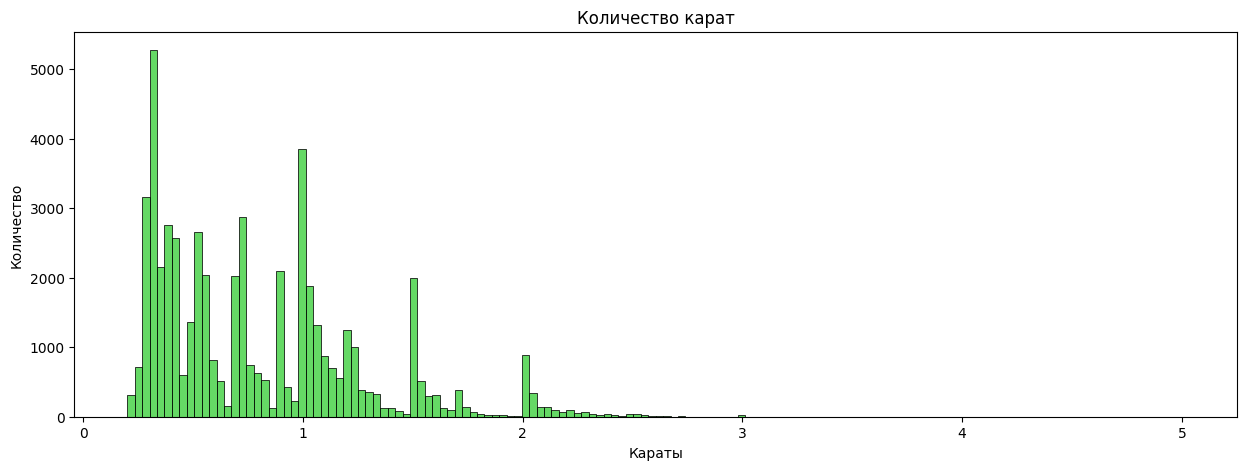

In [ ]:
#посмотрим распределение количества карат
plt.figure(figsize=(15, 5))
sns.histplot(diamonds_df.carat, color='limegreen')
plt.xlabel('Караты')
plt.ylabel('Количество')
plt.title('Количество карат');

<u>У нас довольно большой заброс. Справа длинный хвост. Большинство значений сосредоточены в диапазоне от 0-2</u>

In [ ]:
#выведем среднее
diamonds_df.carat.median()

0.7

<u>В среднем алмазы весят 0.7 карат</u>

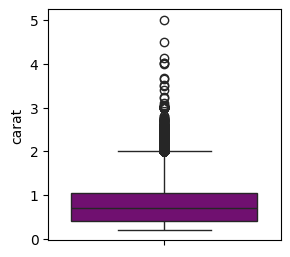

In [ ]:
#посмотрим для данной фичи ящик с усами
plt.figure(figsize=(3, 3))
sns.boxplot(diamonds_df.carat, color='purple');

<u>На графике видно что у нас довольно сильные выбросы. Сосредоточены они за пределамы верхнего квартиля.</u>

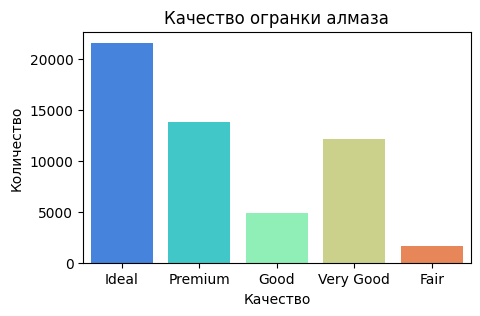

In [ ]:
#посмотрим на  качество огранки алмаза
plt.figure(figsize=(5, 3))
sns.countplot(x=diamonds_df.cut, palette='rainbow')
plt.title('Качество огранки алмаза')
plt.xlabel('Качество')
plt.ylabel('Количество');

<u>Очень мало алмазов с плохим качеством. Больше всего со значением качества 'ideal', т.е. самое лучшее.</u>

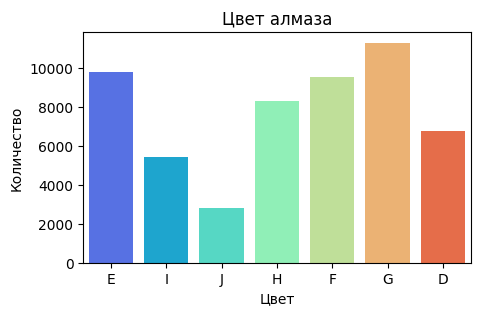

In [ ]:
#посмотрим на цвет алмаза
plt.figure(figsize=(5, 3))
sns.countplot(x=diamonds_df.color, palette='rainbow')
plt.title('Цвет алмаза')
plt.xlabel('Цвет')
plt.ylabel('Количество');

<u>Цвета у нас варьируются от D к J(от худшего к лучшему). DEF - бесцветные. GHIJ - почти бесцветные. Разобьем на два класса для лучшей интерпретации.</u>

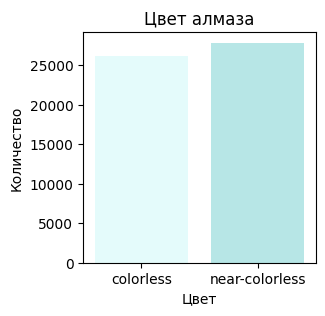

In [ ]:
#посмотрим на цвет алмаза
plt.figure(figsize=(3, 3))
sns.countplot(x=diamonds_df.color.\
              map(lambda x: 'near-colorless' if x > 'F' else 'colorless'),
              palette=['lightcyan', 'paleturquoise'])
plt.title('Цвет алмаза')
plt.xlabel('Цвет')
plt.ylabel('Количество');

<u>Как видим больше алмазов качеством чуть пониже, но в целом разницы значимой нет.</u>

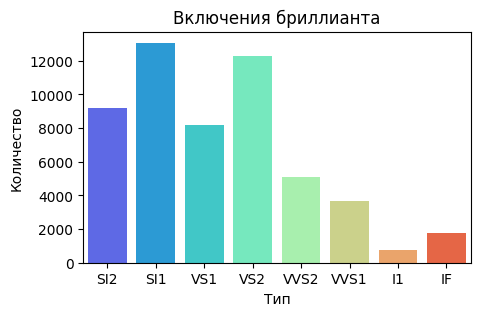

In [ ]:
#включения бриллианта
plt.figure(figsize=(5, 3))
sns.countplot(x=diamonds_df.clarity, palette='rainbow')
plt.title('Включения бриллианта')
plt.xlabel('Тип')
plt.ylabel('Количество');

<u>От лучшего к худшему :  IF, VVS1, VVS2, VS1, VS2, SI1, SI2, I1. Большинство варьируются от среднего качества к плохому. </u>

In [ ]:
#более детально это можно посмотреть если вывести количество каждого класса
diamonds_df.clarity.value_counts()

clarity
SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: count, dtype: int64

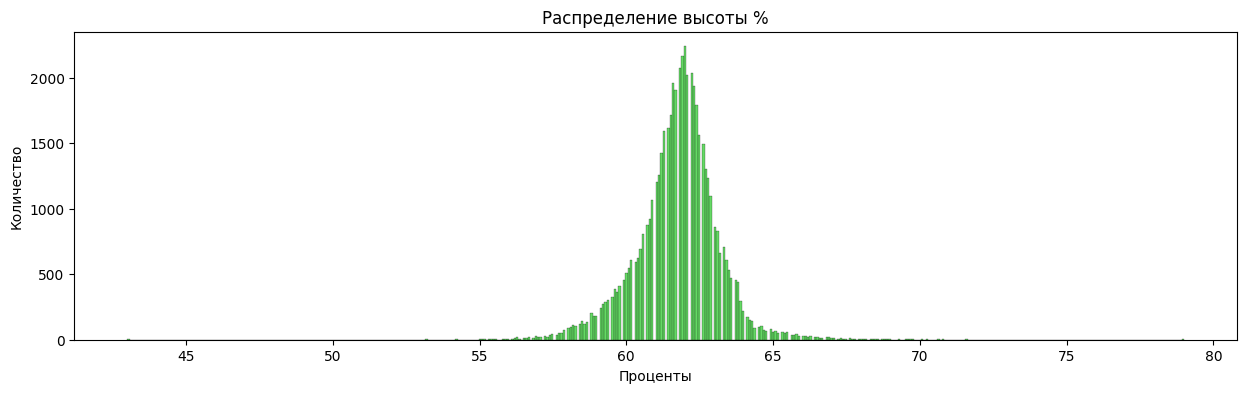

In [ ]:
#построим гистограмму для depth
plt.figure(figsize=(15, 4))
sns.histplot(diamonds_df.depth, color='limegreen')
plt.title('Распределение высоты %')
plt.xlabel('Проценты')
plt.ylabel('Количество');

<u>На первый взгляд кажется что у нас нормальное распределение. Проверим это с помощью библиотеки scipy.</u>

In [ ]:
#проверка с помощью  K'2-тест Д'Агостино
pvalue = stats.normaltest(diamonds_df.depth)
print("%.5f" % pvalue[1])

0.00000


<u>Как видим распределение  не по Гауссу. Увидеть это можно было и на графике, если посмотреть на ось x, большой размах значений, а большинство значений у нас заняли небольшой диапазон</u>

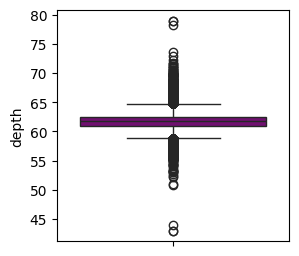

In [ ]:
#посмотрим на выбросы
plt.figure(figsize=(3, 3))
sns.boxplot(diamonds_df.depth, color='purple');

<u>Выбросов много. Расположены за пределами нижней и верхней границ.</u>

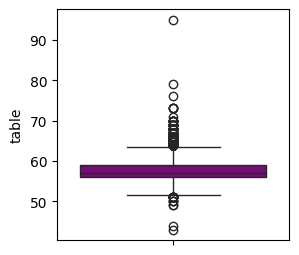

In [ ]:
#посмотрим на выбросы у table
plt.figure(figsize=(3, 3))
sns.boxplot(diamonds_df.table, color='purple');

<u>Здесь похожая ситуация.</u>

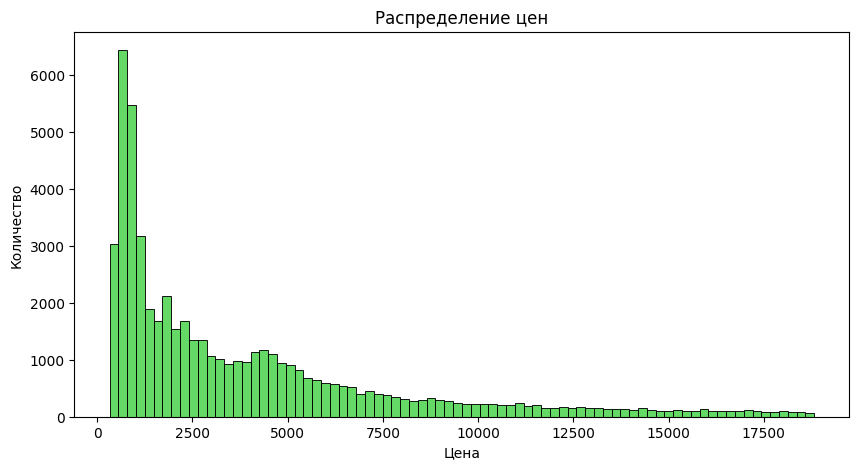

In [ ]:
#распределение цены
plt.figure(figsize=(10, 5))
sns.histplot(diamonds_df.price, color='limegreen')
plt.title('Распределение цен')
plt.xlabel('Цена')
plt.ylabel('Количество');

<u>Распределение ассиметричное. Длинный хвост справа(выбросы).</u>

In [ ]:
#Посмотрим средний ценник на алмазы
diamonds_df.price.median()

2401.0

<u>Средняя цена - 2,4 тыс долларов.</u>

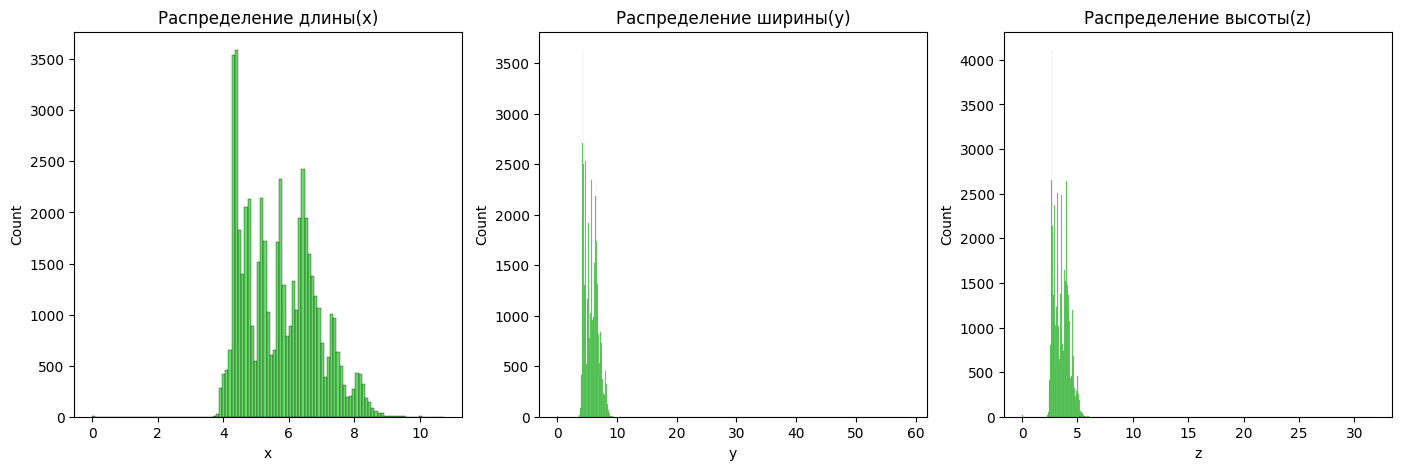

In [ ]:
#распределение x, y,z

fig, axes = plt.subplots(1, 3, figsize=(17, 5))

sns.histplot(ax=axes[0],\
x =diamonds_df.x,
              color='limegreen').\
set_title('Распределение длины(x)')
sns.histplot(ax=axes[1],\
x =diamonds_df.y,
              color='limegreen').\
set_title('Распределение ширины(y)')
sns.histplot(ax=axes[2],\
x =diamonds_df.z,
              color='limegreen').\
set_title('Распределение высоты(z)');

<u>У всех трех фичей наблюдается сильные выбросы, в особенности  у и z.</u>

Построим отдельно scatterplot для каждой комбинации из этих трех фичей. Думаю они будут коррелировать.

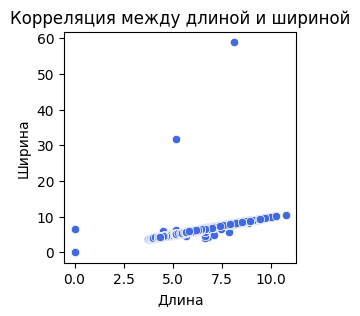

In [ ]:
#x и y
plt.figure(figsize=(3, 3))
sns.scatterplot(x=diamonds_df.x, y=diamonds_df.y, color='royalblue')
plt.title('Корреляция между длиной и шириной')
plt.xlabel('Длина')
plt.ylabel('Ширина');

<u>Два этих признака положительно коррелируют. Чем длиннее, тем шире. Также можно увидеть пару выбросов.</u>

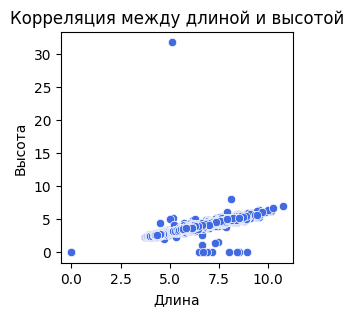

In [ ]:
#x и z
plt.figure(figsize=(3, 3))
sns.scatterplot(x=diamonds_df.x, y=diamonds_df.z, color='royalblue')
plt.title('Корреляция между длиной и высотой')
plt.xlabel('Длина')
plt.ylabel('Высота');

<u>Тут такая же ситуация. Только более сильный разброс.</u>

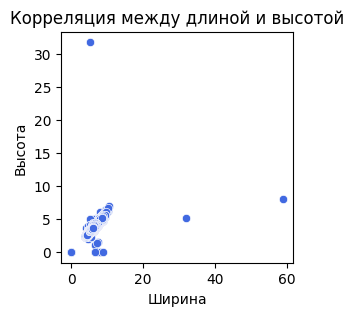

In [ ]:
#y и z
plt.figure(figsize=(3, 3))
sns.scatterplot(x=diamonds_df.y, y=diamonds_df.z, color='royalblue')
plt.title('Корреляция между длиной и высотой')
plt.xlabel('Ширина')
plt.ylabel('Высота');

<u>Здесь тоже положительная корреляция. Только большинство значений скучковались в одном диапазоне.</u>

<h3><font color='dodgerblue'>ПОДГОТОВКА ДАННЫХ</font></h3>

<p style='border:2px black solid; padding:10px'>OrdinalEncoder</p>

In [ ]:
#посмотрим на уникальные значения столбца cut
diamonds_df.cut.unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [ ]:
#создадим объект для cut
encoder_cut = OrdinalEncoder\
(categories=[['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']])

In [ ]:
#обучим
encoder_cut.fit(diamonds_df[['cut']])

OrdinalEncoder(categories=[['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']])

In [ ]:
#изменим столбец
diamonds_df.cut = pd.DataFrame\
(encoder_cut.transform(diamonds_df[['cut']])).astype(int)

In [ ]:
#проверим
diamonds_df.cut

0        4
1        3
2        1
3        3
4        1
        ..
53935    4
53936    1
53937    2
53938    3
53939    4
Name: cut, Length: 53940, dtype: int32

Проделаем то же самое с двумя другими фичами(color, clarity).

In [ ]:
#посмотрим на уникальные значения столбца color
diamonds_df.color.unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [ ]:
#создадим объект
encoder_color = OrdinalEncoder\
(categories=[['J', 'I', 'H', 'G', 'F', 'E', 'D']])

In [ ]:
#обучим и изменим столбец
encoder_color.fit(diamonds_df[['color']])
diamonds_df.color = pd.DataFrame\
(encoder_color.transform(diamonds_df[['color']])).astype(int)

In [ ]:
#посмотрим на уникальные значения столбца clarity
diamonds_df.clarity.unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [ ]:
#создадим объект
encoder_clarity = OrdinalEncoder\
(categories=[['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']])

In [ ]:
#обучим и изменим столбец
encoder_clarity.fit(diamonds_df[['clarity']])
diamonds_df.clarity = pd.DataFrame\
(encoder_clarity.transform(diamonds_df[['clarity']])).astype(int)

In [ ]:
#проверим
diamonds_df.head(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,4,5,1,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,5,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,5,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,1,3,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,0,1,63.3,58.0,335,4.34,4.35,2.75


<u>Как видим все сработало.</u>

<p style='border:2px black solid; padding:10px'>Мультиколлинеарность</p>

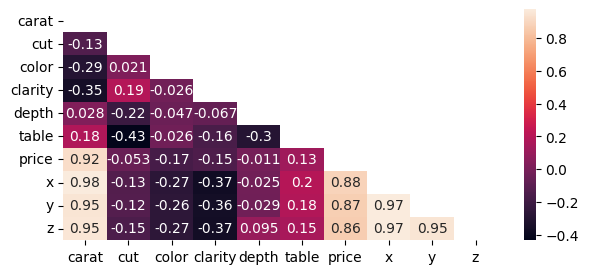

In [ ]:
#посмотрим как признаки коррелируют между собой
plt.figure(figsize=(7, 3))
sns.heatmap(diamonds_df.corr(), annot=True, \
mask=np.triu(diamonds_df.corr()));
%matplotlib inline


<u>Как видим у нас сильная мультиколлинеарность. Целевой признак коррелирует сильно с carat и x, y, z, но эти фичи также сильно коррелируют друг с другом.</u>

In [ ]:
#избавимся от лишних фич
diamonds_df.drop(['x', 'y', 'z'], axis=1, inplace=True)

In [ ]:
#проверим
diamonds_df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price'], dtype='object')

<p style='border:2px black solid; padding:10px'>Отделение целевой переменной</p>

In [ ]:
#отделим нашу целевую переменную
X = diamonds_df.drop('price', axis=1)
y = diamonds_df.price

<p style='border:2px black solid; padding:10px'>StandardScaler</p>

Необходимо масштабировать наши данные, тк буду использовать модель линейной регрессии.

In [ ]:
#создадим объект
scaler = StandardScaler()

In [ ]:
#обучим
scaler.fit(X)

StandardScaler()

In [ ]:
#приведем в датафрейм
X = pd.DataFrame(scaler.transform(X), \
                 columns=diamonds_df.drop('price', axis=1).columns)

In [ ]:
#проверим
X.head(5)

,carat,cut,color,clarity,depth,table
0,-1.198168,0.981473,0.937163,-1.245215,-0.174092,-1.099672
1,-1.240361,0.085889,0.937163,-0.638095,-1.360738,1.585529
2,-1.198168,-1.705279,0.937163,0.576145,-3.385019,3.375663
3,-1.071587,0.085889,-1.414272,-0.030975,0.454133,0.242928
4,-1.029394,-1.705279,-2.002131,-1.245215,1.082358,0.242928


<p style='border:2px black solid; padding:10px'>Тренировочные и тестовые данные</p>

In [ ]:
#разделим данные на тестовые и тренировочные и валидационные
X_train, X_test, y_train, y_test = train_test_split\
(X, y, test_size=0.33, random_state=42)
X_test, X_val, y_test, y_val = train_test_split\
(X_test, y_test, test_size=0.1, random_state=42)

<u>Данные готовы к обучению.</u>

<h3><font color='dodgerblue'>МАШИННОЕ ОБУЧЕНИЕ И НЕЙРОННЫЕ СЕТИ</font></h3>

Задача: регрессия. Метрики качества: MAPE -  выражается в долях/процентах, очень проста в интерпретации. Помимо нее будем также рассматривать RMSE, потому что она больше "наказывает" за выбросы. То есть к примеру, если у нас разница между предсказанными и реальными в одной строке очень большая, то rmse покажет более низкое качество модели в отличие от mape.

<p style='border:2px black solid; padding:10px'>Линейная регрессия</p>

In [ ]:
#создадим объект линейной регрессии
l_reg = LinearRegression()

In [ ]:
#обучим
l_reg.fit(X_train, y_train)

LinearRegression()

In [ ]:
#оценим качество(mape) на валидационной и тестовой выборках
pd.DataFrame([mean_absolute_percentage_error\
              (y_val, l_reg.predict(X_val)),
               mean_absolute_percentage_error\
              (y_test, l_reg.predict(X_test))],
             index=['Валидационная выборка', 'Тестовая выборка'],
             columns=['Средняя абсолютная процентная ошибка'])

,Средняя абсолютная процентная ошибка
Валидационная выборка,0.481209
Тестовая выборка,0.492183


In [ ]:
#оценим качество(rmse) на валидационной и тестовой выборках
pd.DataFrame([mean_squared_error\
              (y_val, l_reg.predict(X_val), squared=False),
             mean_squared_error\
              (y_test, l_reg.predict(X_test), squared=False)],
             index=['Валидационная выборка', 'Тестовая выборка'],
             columns=['Корень из среднеквадратичной ошибки'])

,Корень из среднеквадратичной ошибки
Валидационная выборка,1233.720607
Тестовая выборка,1221.249483


In [ ]:
#сохраним в отдельные переменные
a1 = mean_absolute_percentage_error\
(y_test, l_reg.predict(X_test))
a2 =  mean_squared_error\
(y_test, l_reg.predict(X_test), squared=False)

<u>Как видим на обеих выборках практически одинаковые результаты. Обе метрики показывают что модель работает не очень хорошо.Рассмотрим их по отдельности.</u><br>MAPE на тестовой равно 0.49. Это говорит нам о том, что средняя абсолютная процентная ошибка между ценами, предсказанными моделью, и фактическими ценами составляет 49%. Что довольно много.<br>RMSE на тестовой равно 1221. Данная метрика выдает значение в тех единицах в которых была представлена целевая переменная, в нашем случае - в долларах. Средняя цена у нас на алмазы составляет 2.4 тыс долларов.И ошибка в 1тыс долларов это очень много.

<p style='border:2px black solid; padding:10px'>Метод ближайших соседей</p>

In [ ]:
#создадим обЪект
knr = KNeighborsRegressor()

In [ ]:
#обучим
knr.fit(X_train, y_train)

KNeighborsRegressor()

In [ ]:
#оценим качество(mape) на валидационной и тестовой выборках
pd.DataFrame([mean_absolute_percentage_error\
              (y_val, knr.predict(X_val)),
              mean_absolute_percentage_error\
              (y_test, knr.predict(X_test))],
             index=['Валидационная выборка', 'Тестовая выборка'],
             columns=['Средняя абсолютная процентная ошибка'])

,Средняя абсолютная процентная ошибка
Валидационная выборка,0.152905
Тестовая выборка,0.155268


In [ ]:
#оценим качество(rmse) на валидационной и тестовой выборках
pd.DataFrame([mean_squared_error\
              (y_val, knr.predict(X_val), squared=False),
              mean_squared_error\
              (y_test, knr.predict(X_test), squared=False)],
             index=['Валидационная выборка', 'Тестовая выборка'],
             columns=['Корень из среднеквадратичной ошибки'])

,Корень из среднеквадратичной ошибки
Валидационная выборка,800.530203
Тестовая выборка,810.179863


In [ ]:
#сохраним в отдельные переменные
b1 = mean_absolute_percentage_error\
(y_test, knr.predict(X_test))
b2 =  mean_squared_error\
(y_test, knr.predict(X_test), squared=False)

<u>Тут mape показывает неплохие результаты, но вот rmse все показывает высокие результаты(что минус). Но данная модель явно лучше справляется, чем линейна регрессия.</u>

<p style='border:2px black solid; padding:10px'>Случайный лес</p>

Будем перебирать количество деревьев и максимальную глубину и смотреть mape.

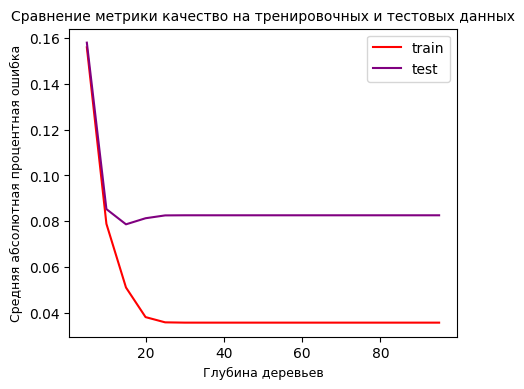

In [ ]:
#перебор глубины
l_depth = []
plt.figure(figsize=(5, 4))
for i in range(5, 100, 5):
    forest1 = RandomForestRegressor(max_depth=i, random_state=42)
    forest1.fit(X_train, y_train)
    metric_train1 = mean_absolute_percentage_error\
    (y_train, forest1.predict(X_train))
    metric_test1 = mean_absolute_percentage_error\
    (y_test, forest1.predict(X_test))
    l_depth.append([i, metric_train1, metric_test1])
l_depth_DataFrame = pd.DataFrame\
(l_depth, columns=['max_depth', 'metric_train1', 'metric_test1'])
l_depth_DataFrame.set_index('max_depth').\
metric_train1.plot(color='red', label='train')
l_depth_DataFrame.set_index('max_depth').\
metric_test1.plot(color='purple', label='test')
plt.title('Сравнение метрики качество на тренировочных и тестовых данных', fontsize=10)
plt.ylabel('Средняя абсолютная процентная ошибка', fontsize=9)
plt.legend()
plt.xlabel('Глубина деревьев', fontsize=9);

<u>С увеличением глубины ошибка никак не меняется. На тренировочных данных результат намного лучше(что ожидаемо).</u>

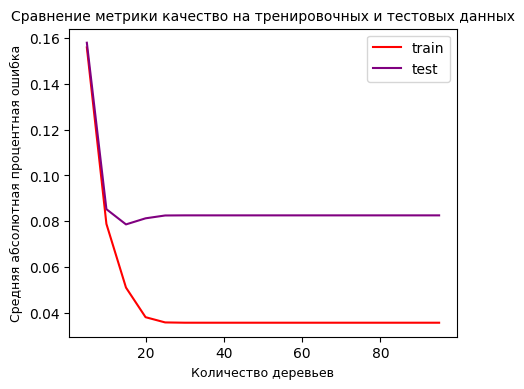

In [ ]:
#перебор количества деревьев
l_estimators = []
plt.figure(figsize=(5, 4))
for i in range(50, 300, 25):
    forest2 = RandomForestRegressor\
    (n_estimators=i, random_state=42)
    forest2.fit(X_train, y_train)
    metric_train2 = mean_absolute_percentage_error\
    (y_train, forest2.predict(X_train))
    metric_test2 = mean_absolute_percentage_error\
    (y_test, forest2.predict(X_test))
    l_estimators.append([i, metric_train2, metric_test2])
l_estimators_DataFrame = pd.DataFrame\
(l_depth, columns=['max_depth', 'metric_train2', 'metric_test2'])
l_estimators_DataFrame.set_index('max_depth').\
metric_train2.plot(color='red', label='train')
l_estimators_DataFrame.set_index('max_depth').\
metric_test2.plot(color='purple', label='test')
plt.title('Сравнение метрики качество на тренировочных и тестовых данных',  fontsize=10)
plt.ylabel('Средняя абсолютная процентная ошибка', fontsize=9)
plt.legend()
plt.xlabel('Количество деревьев', fontsize=9);

<u>Тут такая же ситуация, поэтому не будем задавать значения этим параметрам.</u>

In [ ]:
#создадим объект леса
rfg= RandomForestRegressor(random_state=42)

In [ ]:
#обучим
rfg.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
#оценим качество(mape) на валидационной и тестовой выборках
pd.DataFrame([mean_absolute_percentage_error\
              (y_val, rfg.predict(X_val)),
              mean_absolute_percentage_error\
              (y_test, rfg.predict(X_test))],
             index=['Валидационная выборка', 'Тестовая выборка'],
             columns=['Средняя абсолютная процентная ошибка'])

,Средняя абсолютная процентная ошибка
Валидационная выборка,0.083097
Тестовая выборка,0.082577


In [ ]:
#оценим качество(rmse) на валидационной и тестовой выборках
pd.DataFrame([mean_squared_error\
              (y_val, rfg.predict(X_val), squared=False),
              mean_squared_error\
              (y_test, rfg.predict(X_test), squared=False)],
             index=['Валидационная выборка', 'Тестовая выборка'],
             columns=['Корень из среднеквадратичной ошибки'])

,Корень из среднеквадратичной ошибки
Валидационная выборка,523.906097
Тестовая выборка,550.221368


In [ ]:
#сохраним в отдельные переменные
c1 = mean_absolute_percentage_error\
(y_test, rfg.predict(X_test))
c2 =  mean_squared_error\
(y_test, rfg.predict(X_test), squared=False)

<u>MAPE показывает результаты близкие к идеальным. Ну можно сказать идеальные, тк тут выходит меньше процента.А вот с rmse еще не все так хорошо. Проверим как сработает бустинг. </u>

<p style='border:2px black solid; padding:10px'>Градиентный бустинг</p>

Использовать я буду библиотеку CatBoost.

In [ ]:
#создадим объект
cat = CatBoostRegressor(random_state=42, \
                        iterations=1500, custom_metric=['RMSE', 'MAPE'])

In [ ]:
#обучим
cat.fit(X_train, y_train,
          verbose=False, plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

<u>На графике можно увидеть процесс обучение с рассчетом mape и rmse.</u>

In [ ]:
#оценим качество(mape) на валидационной и тестовой выборках
pd.DataFrame([mean_absolute_percentage_error\
              (y_val, cat.predict(X_val)),
              mean_absolute_percentage_error\
              (y_test, cat.predict(X_test))],
             index=['Валидационная выборка', 'Тестовая выборка'],
             columns=['Средняя абсолютная процентная ошибка'])

,Средняя абсолютная процентная ошибка
Валидационная выборка,0.077987
Тестовая выборка,0.078962


In [ ]:
#оценим качество(rmse) на валидационной и тестовой выборках
pd.DataFrame([mean_squared_error\
              (y_val, cat.predict(X_val), squared=False),
              mean_squared_error\
              (y_test, cat.predict(X_test), squared=False)],
             index=['Валидационная выборка', 'Тестовая выборка'],
             columns=['Корень из среднеквадратичной ошибки'])

,Корень из среднеквадратичной ошибки
Валидационная выборка,494.993571
Тестовая выборка,517.502826


In [ ]:
#сохраним в отдельные переменные
d1 = mean_absolute_percentage_error\
(y_test, cat.predict(X_test))
d2 =  mean_squared_error\
(y_test, cat.predict(X_test), squared=False)

<u>Качество стало чуть лучше в сравнении с лесом решений.</u>

<p style='border:2px black solid; padding:10px'>Нейронные сети</p>

Использовать буду библиотеку tensorflow.

In [ ]:
#создадим модель
#оздадим модель
model = Sequential()
model.add(Dense(1024, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(256,  activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

In [ ]:
#компилируем
model.compile( loss= tf.keras.losses.MeanAbsoluteError(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=tf.keras.metrics.RootMeanSquaredError())

In [ ]:
#обучим
model.fit(X_train, y_train, batch_size=15, \
          epochs=100, verbose=1, validation_split=0.2)

Epoch 1/100

1928/1928 [==============================] - 37s 16ms/step - loss: 554.1826 - root_mean_squared_error: 1232.9117 - val_loss: 387.2479 - val_root_mean_squared_error: 763.6292
Epoch 2/100
1928/1928 [==============================] - 20s 10ms/step - loss: 380.9875 - root_mean_squared_error: 783.9741 - val_loss: 356.9411 - val_root_mean_squared_error: 705.1061
Epoch 3/100
1928/1928 [==============================] - 21s 11ms/step - loss: 369.1549 - root_mean_squared_error: 756.7264 - val_loss: 355.2657 - val_root_mean_squared_error: 696.8553
Epoch 4/100
1928/1928 [==============================] - 19s 10ms/step - loss: 363.4768 - root_mean_squared_error: 723.3805 - val_loss: 329.8735 - val_root_mean_squared_error: 660.4301
Epoch 5/100
1928/1928 [==============================] - 19s 10ms/step - loss: 355.4537 - root_mean_squared_error: 711.7964 - val_loss: 322.8902 - val_root_mean_squared_error: 652.3373
Epoch 6/100
1928/1928 [==============================] - 20s 10ms/step - 

1928/1928 [==============================] - 20s 11ms/step - loss: 286.4608 - root_mean_squared_error: 569.8630 - val_loss: 286.1892 - val_root_mean_squared_error: 567.2231
Epoch 45/100
1928/1928 [==============================] - 21s 11ms/step - loss: 285.5377 - root_mean_squared_error: 566.6998 - val_loss: 274.0885 - val_root_mean_squared_error: 545.6691
Epoch 46/100
1928/1928 [==============================] - 20s 11ms/step - loss: 286.6889 - root_mean_squared_error: 569.8450 - val_loss: 303.9953 - val_root_mean_squared_error: 564.8939
Epoch 47/100
1928/1928 [==============================] - 21s 11ms/step - loss: 285.2191 - root_mean_squared_error: 563.7437 - val_loss: 283.0436 - val_root_mean_squared_error: 557.6608
Epoch 48/100
1928/1928 [==============================] - 20s 10ms/step - loss: 282.3512 - root_mean_squared_error: 560.7627 - val_loss: 308.0107 - val_root_mean_squared_error: 591.9333
Epoch 49/100
1928/1928 [==============================] - 20s 10ms/step - loss: 281

1928/1928 [==============================] - 21s 11ms/step - loss: 271.2521 - root_mean_squared_error: 545.7830 - val_loss: 270.9200 - val_root_mean_squared_error: 532.9493
Epoch 89/100
1928/1928 [==============================] - 23s 12ms/step - loss: 269.8421 - root_mean_squared_error: 541.9259 - val_loss: 279.5841 - val_root_mean_squared_error: 545.8770
Epoch 90/100
1928/1928 [==============================] - 20s 10ms/step - loss: 269.8485 - root_mean_squared_error: 543.5399 - val_loss: 272.6387 - val_root_mean_squared_error: 532.4219
Epoch 91/100
1928/1928 [==============================] - 25s 13ms/step - loss: 268.5926 - root_mean_squared_error: 540.5563 - val_loss: 287.8170 - val_root_mean_squared_error: 542.7250
Epoch 92/100
1928/1928 [==============================] - 23s 12ms/step - loss: 268.0023 - root_mean_squared_error: 537.1628 - val_loss: 275.6169 - val_root_mean_squared_error: 550.8108
Epoch 93/100
1928/1928 [==============================] - 24s 12ms/step - loss: 268

In [ ]:
#оценим качество(mape) на валидационной и тестовой выборках
pd.DataFrame([mean_absolute_percentage_error\
              (y_val, model.predict(X_val)),
              mean_absolute_percentage_error\
              (y_test, model.predict(X_test))],
             index=['Валидационная выборка', 'Тестовая выборка'],
             columns=['Средняя абсолютная процентная ошибка'])

501/501 [==============================] - 3s 5ms/step


,Средняя абсолютная процентная ошибка
Валидационная выборка,0.075627
Тестовая выборка,0.075862


In [ ]:
#оценим качество(rmse) на валидационной и тестовой выборках
pd.DataFrame([mean_squared_error\
              (y_val, model.predict(X_val), squared=False),
              mean_squared_error\
              (y_test, model.predict(X_test), squared=False)],
             index=['Валидационная выборка', 'Тестовая выборка'],
             columns=['Корень из среднеквадратичной ошибки'])

501/501 [==============================] - 2s 3ms/step


,Корень из среднеквадратичной ошибки
Валидационная выборка,516.953107
Тестовая выборка,548.971879


In [ ]:
#сохраним в отдельные переменные
e1 = mean_absolute_percentage_error\
(y_test, model.predict(X_test))
e2 =  mean_squared_error\
(y_test, model.predict(X_test), squared=False)

501/501 [==============================] - 2s 3ms/step


<u>Видим что модель работает хуже чем catboost и случайный лес.</u>

<h3><font color='dodgerblue'>СРАВНЕНИЕ МОДЕЛЕЙ</font></h3>

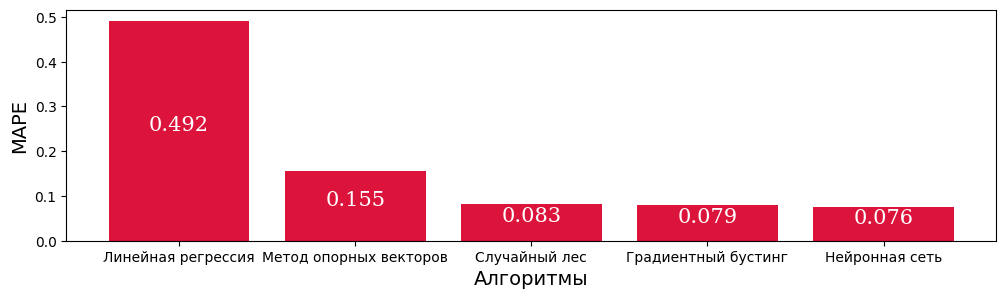

In [ ]:
#сравнение mape
plt.figure(figsize=(12,3))

x = ['Линейная регрессия', 'Метод опорных векторов',
     'Случайный лес','Градиентный бустинг', 'Нейронная сеть']
y = [np.round(a1, 3), np.round(b1, 3),
     np.round(c1, 3), np.round(d1, 3), np.round(e1, 3)]
plt.bar(x, y, color='crimson')
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i]/2, y[i], ha='center',
                 color='white', fontfamily='serif',
                 fontsize=15)
addlabels(x, y)
plt.xlabel("Алгоритмы", fontsize='14')
plt.ylabel("MAPE", fontsize='14')
plt.show()

<u>Как видим лучше всего справляется бустинг. Разница не очень большая между моделями, не считая линейной регрессии. Она показала довольно плохой результат.</u>

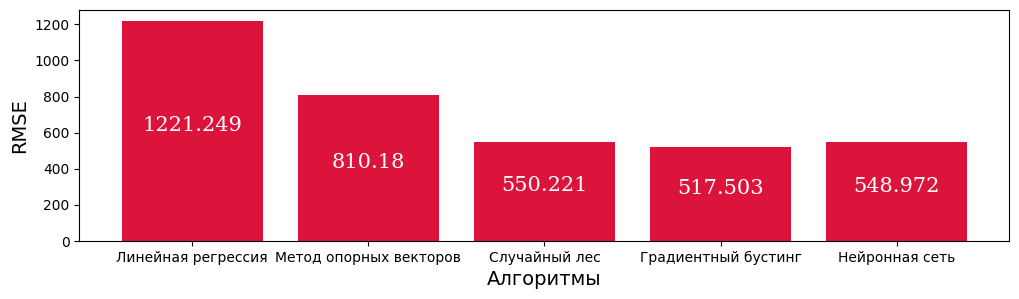

In [ ]:
#сравнение rmse
plt.figure(figsize=(12,3))

x = ['Линейная регрессия', 'Метод опорных векторов',
     'Случайный лес','Градиентный бустинг', 'Нейронная сеть']
y = [np.round(a2, 3), np.round(b2, 3),
     np.round(c2, 3), np.round(d2, 3), np.round(e2, 3)]
plt.bar(x, y, color='crimson')
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i]/2, y[i], ha='center',
                 color='white', fontfamily='serif',
                 fontsize=15)
addlabels(x, y)
plt.xlabel("Алгоритмы", fontsize='14')
plt.ylabel("RMSE", fontsize='14')
plt.show()

<u>Лучшее качество по rmse показывает опять таки бустинг. Случайный лес немного отстает от него.</u>

<h3><font color='dodgerblue'>ИТОГ</font></h3>

Лучше всего сработал бустинг, реализованный с помощью catboost. MAPE составляет на тестовых данных 0.079. Это отличный результат. А вот RMSE у нас 517. Насколько это хорошо? Как по мне отличным результатом это точно не назовешь, а вот 'хорошо' еще приемлимо. Тут надо отталкиваться от средней цены. Она у нас составляет 2.4 тыс долларов и ошибка в 500 долларов, как по мне ощутима. Будь 150 где-то, тогда была бы модель близкая к идеальной.
<br>Возможно при должной доработке нейронная сеть будет показывать наилучший результат.